In [2]:
import os
os.environ['ZFIT_DISABLE_TF_WARNINGS'] = '1'
# numpy is used for generating, storing, and plotting data
import numpy as np

import uproot

# in order to visualise the results of the computation, we use matplotlib
import matplotlib as mpl

import matplotlib.pyplot as plt
import mplhep
plt.style.use(mplhep.style.LHCb2)
plt.rcParams['text.usetex'] = True
# for histograms boost has an easy api and is very fast
import hist
# for statistical distributions we can use a lot from scipy
from scipy import stats

In [5]:
#np.concatenate((np.array([]),data_xicc_turbo_temp),axis=0)

## File import, data processing
 

In [6]:
paths = [f'/eos/lhcb/user/p/pgaigne/job27-CombDVntuple-split-test-{i}.root' for i in range(0,5)]

data_xicc_turbo = np.array([])
data_xicc_rec = np.array([])
data_lc_turbo = np.array([])

for path in paths:
    file = uproot.open(path)
    print(f'Loading file {path}')

    xicc_turbo = file['tuple_sel_Xicc/DecayTree']
    xicc_rec = file['tuple_sel_rec/DecayTree']
    lc_turbo = file['tuple_sel_Lc/DecayTree']

    data_xicc_turbo_temp = xicc_turbo['Xicc_M'].array(library="np")
    data_xicc_rec_temp = xicc_rec['Xicc_M'].array(library="np")
    data_lc_turbo_temp = lc_turbo['Lc_M'].array(library="np")

    data_xicc_turbo = np.concatenate((data_xicc_turbo, data_xicc_turbo_temp), axis=0)
    data_xicc_rec = np.concatenate((data_xicc_rec, data_xicc_rec_temp), axis=0)
    data_lc_turbo = np.concatenate((data_lc_turbo, data_lc_turbo_temp), axis=0)

    file.close()

## Xicc Turbo plot

In [7]:
data = data_xicc_turbo

data_min = data.min()
data_max = data.max()

print(f'Min: {data_min:.3f} Max: {data_max:.3f}')
print(f'Number of events: {len(data)}')

obs_min = 3500
obs_max = 3700
obs_bin_width = 5
obs_bin = int((obs_max-obs_min)/obs_bin_width)

Min: 3099.076 Max: 4976.554
Number of events: 1961429


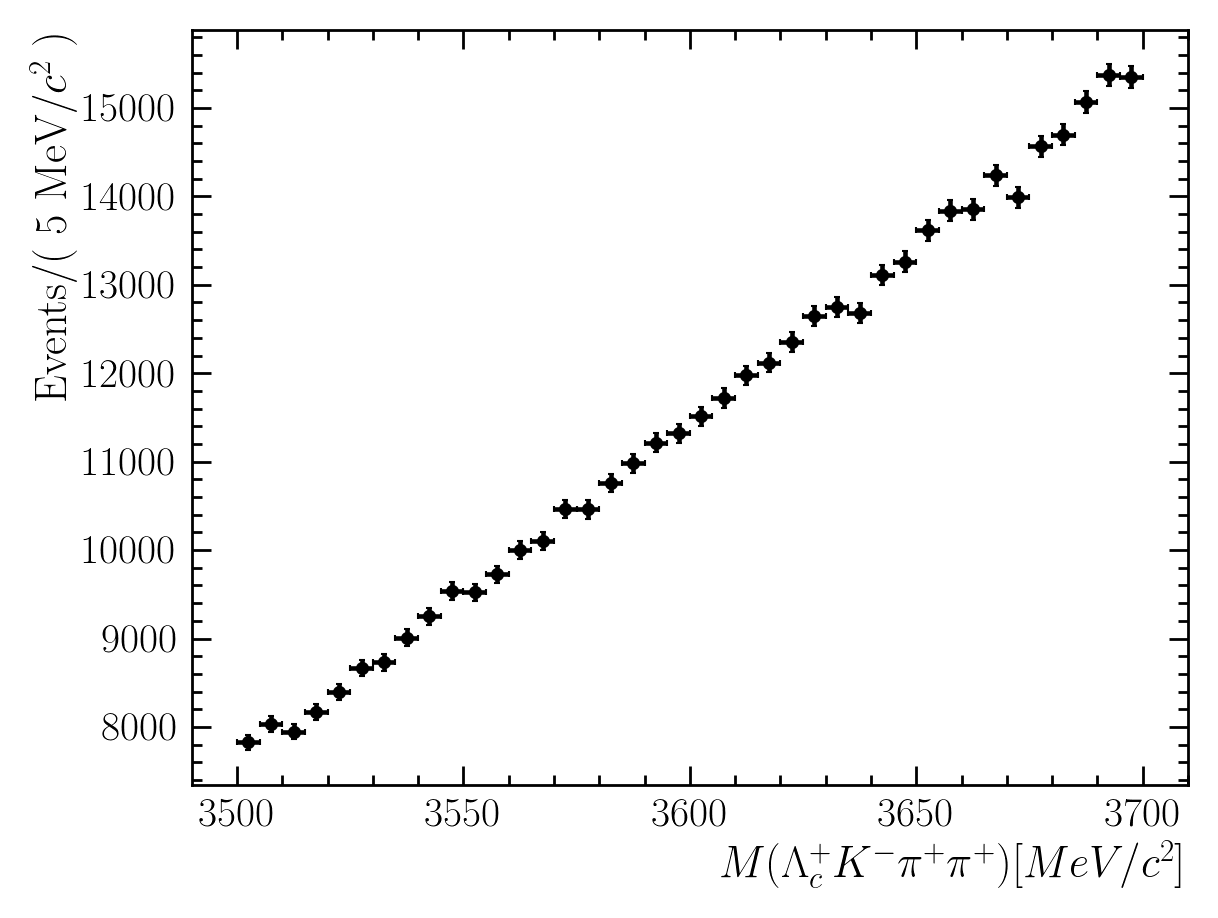

In [8]:
# visualise the data using a histogram:
fig, ax = plt.subplots()
# histogram with centered bins
histo = hist.Hist(hist.axis.Regular(obs_bin, obs_min, obs_max, label='Observable'))
histo.fill(data)
# errorbar histogram for the data
ax.errorbar(histo.axes.centers[0], histo.values(), xerr=histo.axes.widths[0]/2,
           yerr=np.sqrt(histo.values()), fmt='.', label='Data', color='black')
# labels
#ax.set_xlabel('$m_{cand}(\Xi_{cc}^{++})[MeV/c^2]$')
ax.set_xlabel('$M(\Lambda_c^+ K^- \pi^+ \pi^+)[MeV/c^2]$')
ax.set_ylabel(f'Events/( {obs_bin_width} MeV/$c^2$ )');

## Xicc Reconstruction plot

In [13]:
data = data_xicc_rec

data_min = data.min()
data_max = data.max()

print(f'Min: {data_min:.3f} Max: {data_max:.3f}')
print(f'Number of events: {len(data)}')

obs_min = 3500
obs_max = 3700
obs_bin_width = 5
obs_bin = int((obs_max-obs_min)/obs_bin_width)

Min: -4805.907 Max: 4237.948
Number of events: 132518329


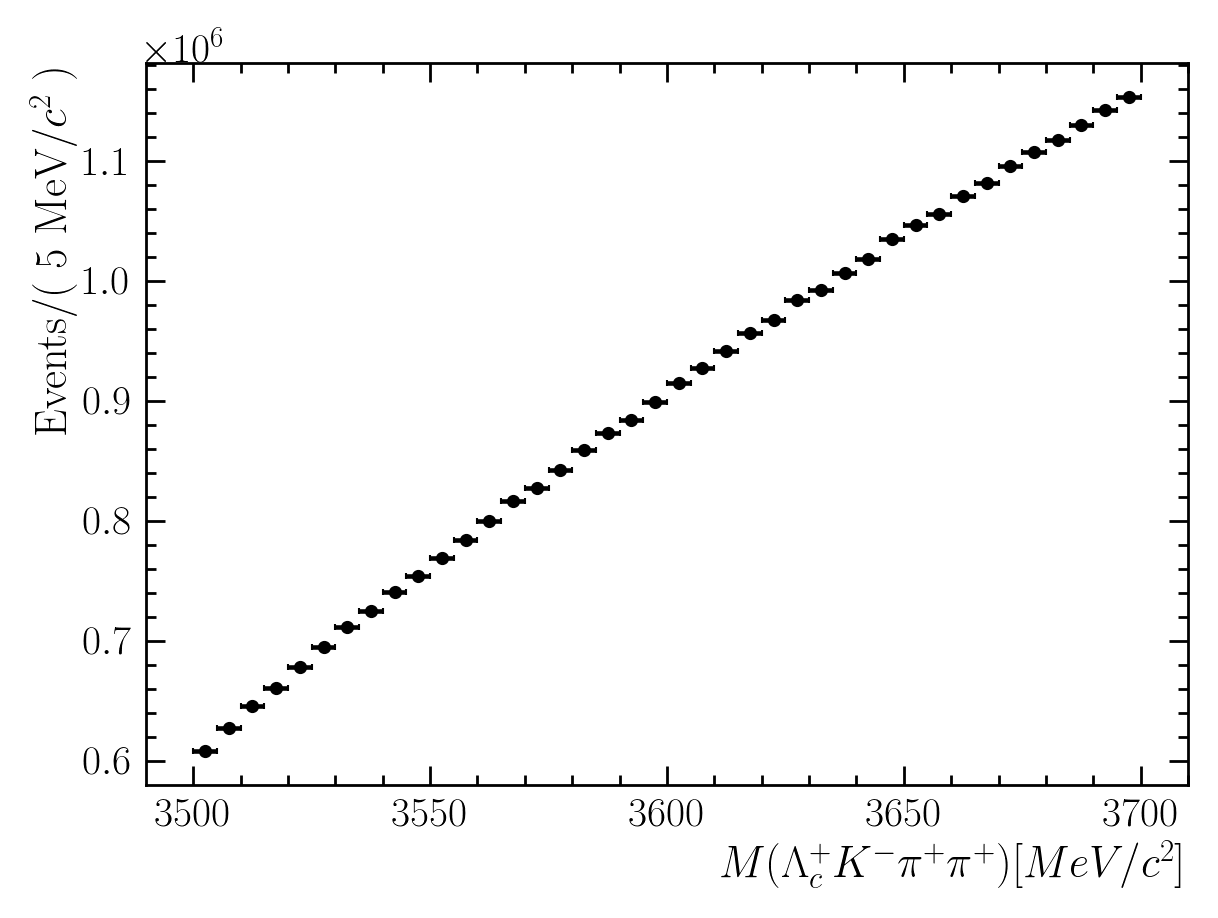

In [14]:
# visualise the data using a histogram:
fig, ax = plt.subplots()
# histogram with centered bins
histo = hist.Hist(hist.axis.Regular(obs_bin, obs_min, obs_max, label='Observable'))
histo.fill(data)
# errorbar histogram for the data
ax.errorbar(histo.axes.centers[0], histo.values(), xerr=histo.axes.widths[0]/2,
           yerr=np.sqrt(histo.values()), fmt='.', label='Data', color='black')
# labels
#ax.set_xlabel('$m_{cand}(\Xi_{cc}^{++})[MeV/c^2]$')
ax.set_xlabel('$M(\Lambda_c^+ K^- \pi^+ \pi^+)[MeV/c^2]$')
ax.set_ylabel(f'Events/( {obs_bin_width} MeV/$c^2$ )');

## Lc Turbo plot

In [11]:
data = data_lc_turbo

data_min = data.min()
data_max = data.max()

print(f'Min: {data_min:.3f} Max: {data_max:.3f}')
print(f'Number of events: {len(data)}')

obs_min = data_min
obs_max = data_max
obs_bin_width = 3
obs_bin = int((obs_max-obs_min)/obs_bin_width)

Min: 2211.000 Max: 2362.000
Number of events: 64977771


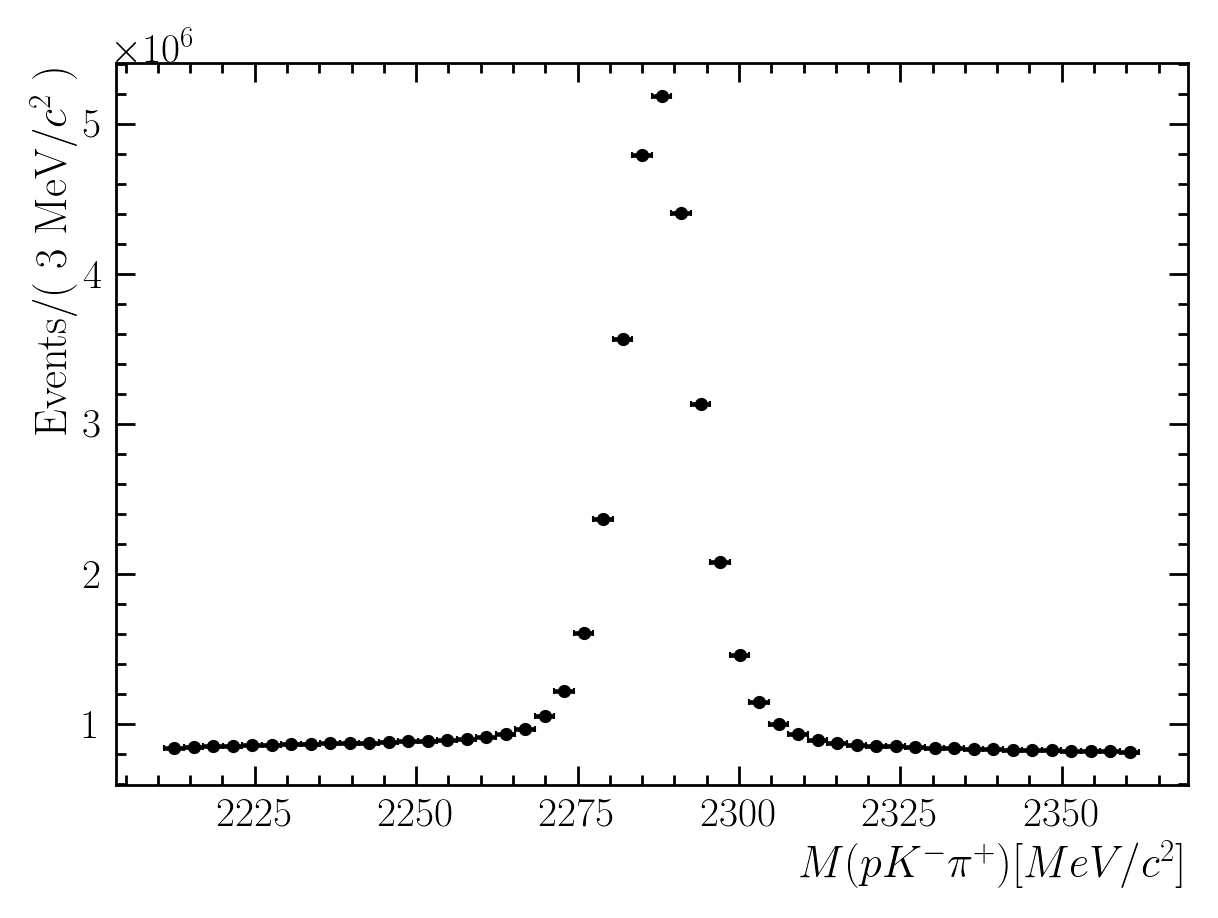

In [12]:
# visualise the data using a histogram:
fig, ax = plt.subplots()
# histogram with centered bins
histo = hist.Hist(hist.axis.Regular(obs_bin, obs_min, obs_max, label='Observable'))
histo.fill(data)
# errorbar histogram for the data
ax.errorbar(histo.axes.centers[0], histo.values(), xerr=histo.axes.widths[0]/2,
           yerr=np.sqrt(histo.values()), fmt='.', label='Data', color='black')
# labels
#ax.set_xlabel('$m_{cand}(\Xi_{cc}^{++})[MeV/c^2]$')
ax.set_xlabel('$M(p K^- \pi^+)[MeV/c^2]$')
ax.set_ylabel(f'Events/( {obs_bin_width} MeV/$c^2$ )');